# Lab 3

**Oguz Tanatar**

Let's start with our usual imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

## Problem 1

In [2]:
data = np.loadtxt('C:/Users/destr/Downloads/atlas_z_to_ll.csv', delimiter = ',', skiprows=1)

### Problem 2

In [3]:
#give names to relevant columns
pt1 =data[:,0]
pt2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]

#define px
px1 = pt1 * np.cos(phi1)
px2 = pt2 * np.cos(phi2)

#define py
py1 =pt1 * np.sin(phi1)
py2 = pt2 * np.sin(phi2)

#define pz
pz1 = pt1 * np.sinh(eta1)
pz2 = pt2 * np.sinh(eta2)

#define total momentum components
px = px1 + px2
py = py1 + py2
pz = pz1 + pz2

#find total momentum square magnitude
p_sq = px**2 + py**2 + pz**2

#define total energy
E = E1 + E2

#find mass
M = np.sqrt(E**2 - p_sq)
print(M, fr'GeV / c^2')



[92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693] GeV / c^2


### Problem 3

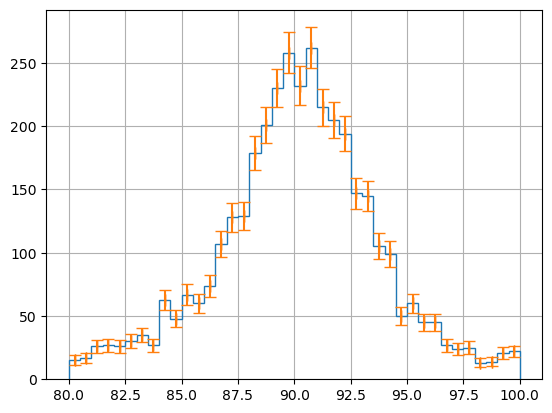

In [4]:
bins = np.linspace(80, 100, 41)
fig, ax = plt.subplots()
hist_data = ax.hist(M, bins, histtype = 'step')
freq = hist_data[0]
bin_num = hist_data[1]

#we want to plot the errorbars at the middle of the bins, so let's take the midpoints of the bins
bin_centers = np.zeros(40)
for i in range(40):
    bin_centers[i] = (bin_num[i] + bin_num[i+1]) / 2

 
ax.errorbar(bin_centers, freq, np.sqrt(freq), 0, fmt = 'o', ms = 0.5, capsize = 4)
ax.grid(True)

Histogram of counts per mass bin mass is on the x-axis, and the counts are on the y-axis. 

## Part 2

### Problem 1

In [5]:
def D(m, m0, Gamma):
    numerator = Gamma / 2
    denominator = ((m-m0)**2 + (Gamma / 2)**2)*np.pi
    return numerator / denominator

### Problem 2

In [6]:
#import curve_fit
from scipy.optimize import curve_fit

#make mask
mask = (bin_centers > 87) & (bin_centers < 93)

#renormalize D
def D_renorm(m, m0, Gamma):
    return 5000/2 * D(m, m0, Gamma)

#get extract frequency and bin values in the mask:
bin_mask = bin_centers[mask]
freq_mask = freq[mask]

popt, covar = curve_fit(D_renorm, bin_mask, freq_mask, sigma = np.sqrt(freq_mask), absolute_sigma=True, p0 = (91, 3))


### Problem 3

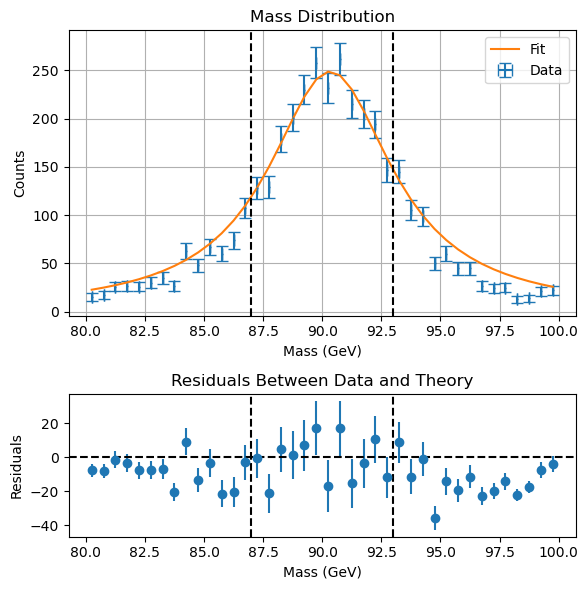

In [7]:
fig, ax = plt.subplots(2, figsize = (6, 6), height_ratios=(2, 1))
ax1 = ax[0]
ax2 = ax[1]
#plotting data
ax1.errorbar(bin_centers, freq, np.sqrt(freq), 0, fmt = 'o', ms = 0.5, capsize = 4, label = 'Data')
ax1.grid(True)

#set up best fit parameters and uncertainties
m0_best = popt[0]
gamma_best = popt[1]
sig_m0_best = np.sqrt(covar[0,0])
sig_gamma_best = np.sqrt(covar[1,1])

#plot theory curve
D_fit = D_renorm(bin_centers, m0_best, gamma_best)

ax1.plot(bin_centers, D_fit, label = 'Fit')

#vertical lines
ax1.axvline(87, ls = '--', color = 'black')
ax1.axvline(93, ls = '--', color = 'black')

#make plot look nice
ax1.legend()
ax1.set_ylabel('Counts')
ax1.set_xlabel(r'Mass (GeV)')
ax1.set_title('Mass Distribution')



#create plot of residuals
residuals = freq - D_fit
residuas_err = np.sqrt(freq)
ax2.errorbar(bin_centers, residuals, residuas_err, fmt = 'o')
ax2.axhline(0, color = 'black', ls = '--')

## vertical lines for resiudals
ax2.axvline(87, ls = '--', color = 'black')
ax2.axvline(93, ls = '--', color = 'black')

#make residual plot look nice
ax2.set_title('Residuals Between Data and Theory')
ax2.set_ylabel('Residuals')
ax2.set_xlabel(r'Mass (GeV)')
fig.tight_layout()

Preliminary Figure 1: (a) Histogram with fitting parameters determined from curve_fit. The orange line is the fit, while the blue errorbars are the data. (b) The residuals (determined by subtracting theory from data) plotted against the mass bins.  

### Problem 4

In [8]:
#we will use scipy.stats to calculate the p-value
import scipy.stats as st

#find chi2
chi_2_num = residuals[mask]**2
chi_2_den = (freq[mask]) #sigma^2
chi_2_terms = chi_2_num/chi_2_den
chi2 = sum(chi_2_terms)

#find ndof
N = len(chi_2_num)
nu = N - 2
chi2_reduced = chi2 / nu

#use st.chi2.sf to find p
p = st.distributions.chi2.sf(chi2, nu)
print(f'the chi-square is {chi2}, the reduced chi2 is {chi2_reduced}, the p-value is {p}')

the chi-square is 9.98509716426498, the reduced chi2 is 0.998509716426498, the p-value is 0.44180173856261695


### Problem 5

In [9]:
print(f'The best fit mass is {m0_best} GeV, with an uncertainty of {sig_m0_best} GeV.')

The best fit mass is 90.34080567882052 GeV, with an uncertainty of 0.09351510730855443 GeV.


### Problem 6 

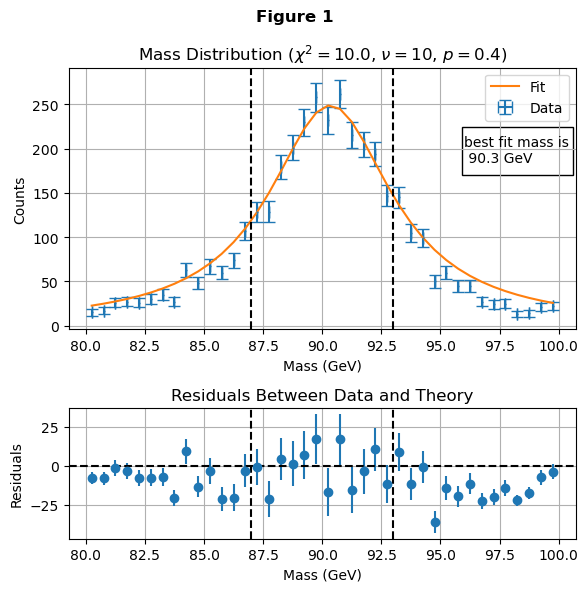

In [10]:
# copy plot
fig, ax = plt.subplots(2, figsize = (6, 6), height_ratios=(2, 1))
ax1 = ax[0]
ax2 = ax[1]

ax1.errorbar(bin_centers, freq, np.sqrt(freq), 0, fmt = 'o', ms = 0.5, capsize = 4, label = 'Data')
ax1.grid(True)
ax1.plot(bin_centers, D_fit, label = 'Fit')

#vertical lines
ax1.axvline(87, ls = '--', color = 'black')
ax1.axvline(93, ls = '--', color = 'black')

#make plot look nice
ax1.legend()
ax1.set_ylabel('Counts')
ax1.set_xlabel(r'Mass (GeV)')
ax1.set_title(fr'Mass Distribution ($\chi^2 = {chi2:.1f}$, $\nu = {nu}$, $p = {p:.1f})$')

#create plot of residuals
residuals = freq - D_fit
residuas_err = np.sqrt(freq)
ax2.errorbar(bin_centers, residuals, residuas_err, fmt = 'o')
ax2.axhline(0, color = 'black', ls = '--')

## vertical lines for resiudals
ax2.axvline(87, ls = '--', color = 'black')
ax2.axvline(93, ls = '--', color = 'black')

#make residual plot look nice
ax2.set_title('Residuals Between Data and Theory')
ax2.set_ylabel('Residuals')
ax2.set_xlabel(r'Mass (GeV)')

fig.suptitle('Figure 1', ha = 'center', weight = 750)
fig.tight_layout()

#annotations
from matplotlib.patches import Rectangle #so that we can make our annotation look nice. 
rect = Rectangle((95.9, 170), 4.7, 55, color = 'black', fill = False)
ax1.add_patch(rect)
ax2.grid(True)


ax1.annotate(text = (f'best fit mass is \n {m0_best:.1f} GeV'), xy = (96, 185));

Figure 1: The vertical dashed lines represent the fitting range. (a) The mass histogram of the Z^0 boson, overlayed with the Breit-Wigner function fitted over the mass bin centers of 87 to 93 GeV. The statistically relevant quantities are listed in the title, and the best-fit mass is 90.3 GeV. (b) Residuals between the fit and data. The horizontal dashed line represents perfect agreement.

## Part 3

### Question 1

In [11]:
m0_test_range = np.linspace(89, 91, 300)
gamma_test_range = np.linspace(5, 8, 300)
m0_test, gamma_test = np.meshgrid(m0_test_range, gamma_test_range)

chi2_grid = np.zeros_like(m0_test)

for i in range(300):
    for j in range(300): 
        model_vals = D_renorm(bin_mask, m0_test[i, j], gamma_test[i, j])
        chi2_grid[i, j] = np.sum((freq_mask - model_vals)**2 / freq_mask)

### Question 2

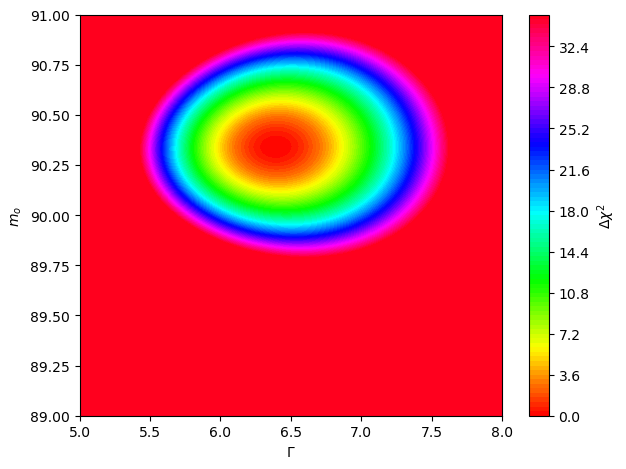

In [12]:
#get delta chi2
delta_chi2 = chi2_grid - chi2
delta_chi2_clip = np.clip(delta_chi2, 0, 35)
#set up plot
fig, ax = plt.subplots()
contourf = ax.contourf(gamma_test, m0_test, delta_chi2_clip, levels = 100, cmap = 'hsv')
ax.set_ylabel(r'$m_o$')
ax.set_xlabel(r'$ \Gamma $')
cbar = fig.colorbar(contourf)
cbar.set_label(r'$\Delta \chi^2$')
ax.set_label(r'$\Delta \chi^2 Map Part 4 Question 2')
plt.tight_layout()

### Problem 3

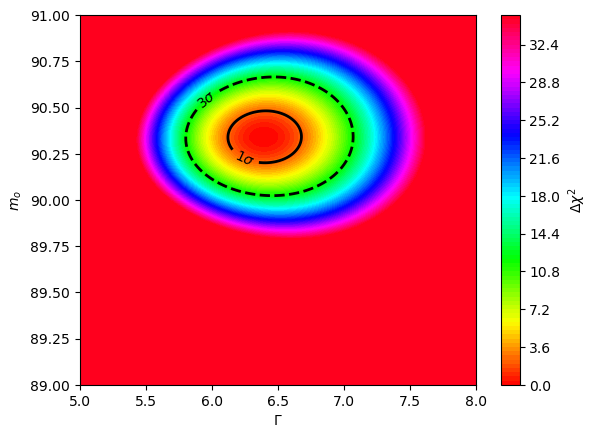

In [13]:
#copy the plot from the previous question 
fig, ax = plt.subplots()
contourf = ax.contourf(gamma_test, m0_test, delta_chi2_clip, levels = 100, cmap = 'hsv')
ax.set_ylabel(r'$m_o$')
ax.set_xlabel(r'$\Gamma$')
cbar = fig.colorbar(contourf)
cbar.set_label(r'$\Delta \chi^2$')

#A quick calculation gives that the chi-square difference corresponding to 1 sigma for this case is 2.30, and for 3 sigma is 11.83. 
#we can make the correct contours by adjusting the levels parameter to be an array with only the correct value
sig1_contour = ax.contour(gamma_test, m0_test, delta_chi2_clip, levels = [2.30], colors = 'black', linewidths = 2)
sig3_contour = ax.contour(gamma_test, m0_test, delta_chi2_clip, levels = [11.83], colors = 'black', linewidths = 2, linestyles = '--')

#label contours
ax.clabel(sig1_contour, sig1_contour.levels, fmt = r'1$\sigma$', fontsize = 10)
ax.clabel(sig3_contour, sig3_contour.levels, fmt = r'3$\sigma$', fontsize = 10);

### Problem 4

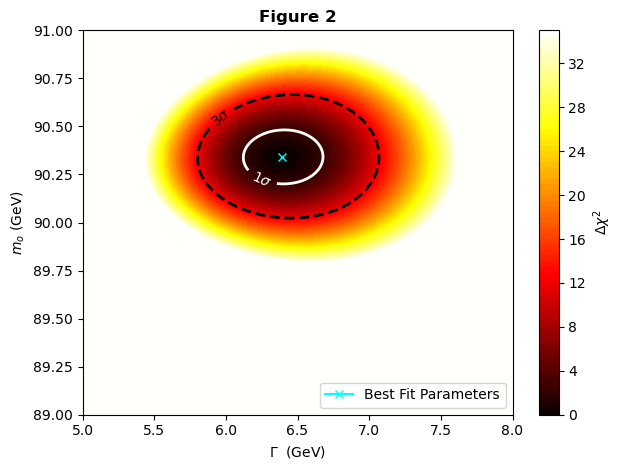

In [14]:
#copy the previous plot
fig, ax = plt.subplots()
contourf = ax.contourf(gamma_test, m0_test, delta_chi2_clip, levels = 70, cmap = 'hot') #change colormap so that the legend can lay in whitespace
ax.set_ylabel(r'$m_o$ (GeV)')
ax.set_xlabel(r'$\Gamma$  (GeV)')
cbar = fig.colorbar(contourf)
cbar.set_label(r'$\Delta \chi^2$')


sig1_contour = ax.contour(gamma_test, m0_test, delta_chi2_clip, levels = [2.30], colors = 'white', linewidths = 2)
sig3_contour = ax.contour(gamma_test, m0_test, delta_chi2_clip, levels = [11.83], colors = 'black', linewidths = 2, linestyles = '--')

ax.clabel(sig1_contour, sig1_contour.levels, fmt = r'1$\sigma$', fontsize = 10)
ax.clabel(sig3_contour, sig3_contour.levels, fmt = r'3$\sigma$', fontsize = 10);


#plot the x
ax.plot(gamma_best, m0_best, marker = 'x', color = 'cyan', label = 'Best Fit Parameters')
ax.set_title('Figure 2', weight = 750)
ax.legend(loc = 'lower right')
plt.tight_layout()

Figure 2: Δχ^2  contour map for the width and invariant mass fitting parameters. The minimum χ^2 is denoted by the cyan x mark. The black region corresponds to smaller differences and the brighter regions correspond to larger differences. For convenience, the 3σ contour has been marked in a black dashed line, and the 1σ has been marked in a white solid line. The  Δχ^2 was also clipped at 35 units for ease of reading.  